In [1]:
# Import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.constraints import maxnorm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# To Load dataset

filename = "./Wine Quality/wine.csv"
df = pd.read_csv(filename, index_col='index')
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe

In [3]:
# To convert binary classification of quality 
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [4]:
# Creating a test/train split

X = df.iloc[:, 0:11]
y= df.iloc[:, 11]

# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [5]:
# Create the normalization
norm = MinMaxScaler()

norm_fit = norm.fit(X_train)
scaled_Xtrain = norm_fit.transform(X_train)

scaled_Xtest = norm_fit.transform(X_test)

In [21]:
# Function to create model, required for KerasClassifier

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(1)))
model.add(Dense(30, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(1)))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mse', optimizer=Adam(learning_rate =0.001), metrics=['accuracy'])
    

# define the grid search parameters
history = model.fit(X_train, y_train, epochs=150, batch_size = 40, validation_split=0.1, verbose=1)


Epoch 1/150
117/117 [==============================] - 2s 7ms/step - loss: 0.2478 - accuracy: 0.6365 - val_loss: 0.2290 - val_accuracy: 0.6635
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.6410 - val_loss: 0.2346 - val_accuracy: 0.6538
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.6410 - val_loss: 0.2468 - val_accuracy: 0.6462
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.6380 - val_loss: 0.2261 - val_accuracy: 0.6519
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.6378 - val_loss: 0.2223 - val_accuracy: 0.6558
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.6412 - val_loss: 0.2215 - val_accuracy: 0.6596
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.6378 - val_loss: 0.2182 - val_accuracy: 0.6615

117/117 [==============================] - 0s 3ms/step - loss: 0.1715 - accuracy: 0.7385 - val_loss: 0.1772 - val_accuracy: 0.7500
Epoch 58/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.7409 - val_loss: 0.1790 - val_accuracy: 0.7346
Epoch 59/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.7295 - val_loss: 0.1810 - val_accuracy: 0.7308
Epoch 60/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.7406 - val_loss: 0.1783 - val_accuracy: 0.7365
Epoch 61/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.7421 - val_loss: 0.1877 - val_accuracy: 0.7135
Epoch 62/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.7387 - val_loss: 0.1908 - val_accuracy: 0.7077
Epoch 63/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.7334 - val_loss: 0.1798 - val_accuracy: 0.7385
Epoch

117/117 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.7479 - val_loss: 0.1757 - val_accuracy: 0.7596
Epoch 114/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.7471 - val_loss: 0.1780 - val_accuracy: 0.7615
Epoch 115/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.7441 - val_loss: 0.1801 - val_accuracy: 0.7327
Epoch 116/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.7458 - val_loss: 0.1802 - val_accuracy: 0.7385
Epoch 117/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.7471 - val_loss: 0.1765 - val_accuracy: 0.7365
Epoch 118/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.7402 - val_loss: 0.1781 - val_accuracy: 0.7019
Epoch 119/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.7439 - val_loss: 0.1819 - val_accuracy: 0.7019

In [22]:
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

[[0.30202144]
 [0.48435685]
 [0.59704465]
 ...
 [0.3106315 ]
 [0.81870365]
 [0.29077226]]


In [23]:
# evaluate the train set
scores_train = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_train[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

163/163 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.7441

loss: 16.87%

accuracy: 74.41%


In [24]:
# evaluate the test set
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.7377

loss: 17.50%

accuracy: 73.77%


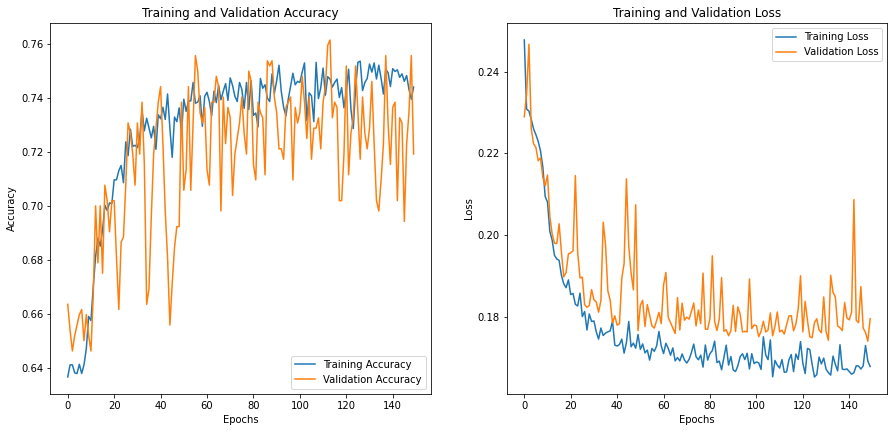

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# To change type of the y_pred 
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [27]:
# To see the classifiaction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       477
           1       0.83      0.73      0.78       823

    accuracy                           0.74      1300
   macro avg       0.73      0.74      0.73      1300
weighted avg       0.75      0.74      0.74      1300



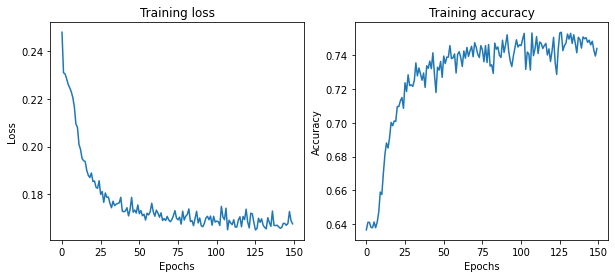

In [31]:
# To plot train accuracy and loss
loss = history.history['loss']
accuracy = history.history['accuracy']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

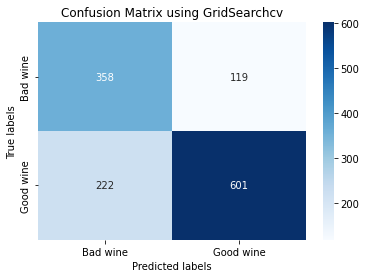

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.Blues) # annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix using GridSearchcv')
ax.xaxis.set_ticklabels(['Bad wine', 'Good wine']); ax.yaxis.set_ticklabels(['Bad wine', 'Good wine']);
plt.show()